In [1]:
import pandas as pd
import numpy as np
import os
source_dir = './twitterdata'
os.listdir(source_dir)

['edges.csv', 'mbti_labels.csv', 'user_info.csv', 'user_tweets.csv']

In [2]:
tweets_file = os.path.join(source_dir, "user_tweets.csv")
labels_file = os.path.join(source_dir, "mbti_labels.csv")
info_file = os.path.join(source_dir, "user_info.csv")
edges_file = os.path.join(source_dir, "edges.csv")

In [3]:
tweets_df = pd.read_csv(tweets_file, lineterminator="\n")
labels_df = pd.read_csv(labels_file)
info_df = pd.read_csv(info_file)
edges_df = pd.read_csv(edges_file)

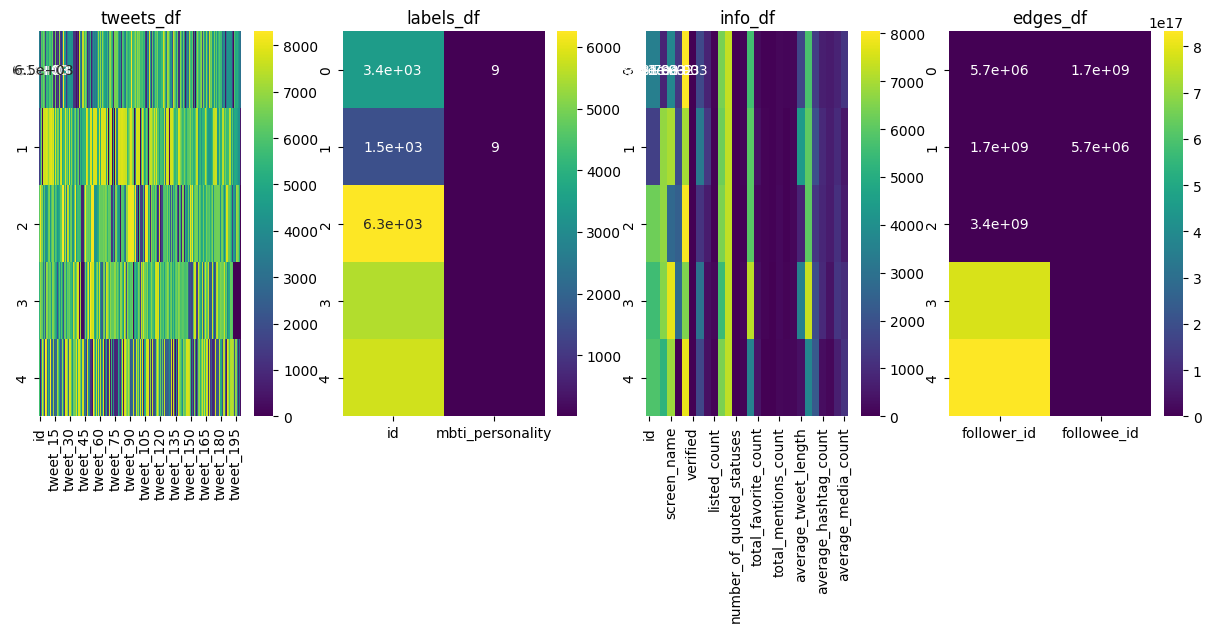

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display first few rows of each DataFrame
def display_dataframes(df_list, names):
    fig, axes = plt.subplots(nrows=1, ncols=len(df_list), figsize=(15, 5))

    for i, (df, name) in enumerate(zip(df_list, names)):
        ax = axes[i]
        ax.set_title(name)

        # Check if the DataFrame contains numeric or non-numeric data
        if df.dtypes.apply(pd.api.types.is_numeric_dtype).all():
            sns.heatmap(df.head(), annot=True, cmap='viridis', ax=ax)
        else:
            sns.heatmap(df.astype('category').apply(lambda x: x.cat.codes).head(), annot=True, cmap='viridis', ax=ax)

    plt.show()

# Provide a list of DataFrames and their corresponding names
df_list = [tweets_df, labels_df, info_df, edges_df]
names = ['tweets_df', 'labels_df', 'info_df', 'edges_df']

# Display the first few rows of each DataFrame
display_dataframes(df_list, names)


In [5]:
text_df = tweets_df.copy(deep=True)
text_df[["name", "screen_name", "location", "description"]] = info_df[["name", "screen_name", "location", "description"]]
info_df.drop(["name", "screen_name", "location", "description"], axis=1, inplace=True)
text_df = text_df.astype("str")
text_df.fillna("", inplace=True)
text_df["combined_tweets"] = text_df.sum(axis=1)
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Columns: 206 entries, id to combined_tweets
dtypes: object(206)
memory usage: 13.1+ MB


In [6]:
missing_values_after_imputation = text_df.isnull().sum()
print("Columns with missing values after imputation:")
print(missing_values_after_imputation)

Columns with missing values after imputation:
id                 0
tweet_1            0
tweet_2            0
tweet_3            0
tweet_4            0
                  ..
name               0
screen_name        0
location           0
description        0
combined_tweets    0
Length: 206, dtype: int64


In [7]:
#convert to lower case
text_df['clean_tweet'] = text_df['combined_tweets'].str.lower()
text_df.sample(frac=1).head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
5597,2202617048,RT @sawavibe: this is how you mind your busine...,@threnodiaI JUG,"RT @lepas: Hey, PSA that if public schools in ...",RT @alicenpai: I still cry over how FUN p4 is ...,RT @pushmatrix: It's VR Jenga but your fingers...,fuck weinstein!,RT @DDsulzbach: Dropping a brand new video! M...,RT @tonkatsu0209: ごはんの時間！(๑´ڡ`๑) https://t.co/...,RT @JMcFly18: This cannot be comfortable https...,...,RT @SailorMoonSub: I was hoping you would have...,@CagleCats KITTEN SEASON!!,RT @shipperinjapan: I've been watching Lupin I...,RT @dFxNckOvk4gNit1: https://t.co/giLVTvk37w,☆ jenn ☆,epiphanyfields_,💛💛💛,26 - nb [they/them] - isfj - icon @erandur !,2202617048RT @sawavibe: this is how you mind y...,2202617048rt @sawavibe: this is how you mind y...
1893,31867534,I can still remember the time I found out @mis...,Ok I’m rewatching Four Wedding and a Funeral c...,Finally done listening to 11/22/63!!! @Stephen...,RT @jdmaccoby: If you’re feeling sick you have...,@taytayfree I can’t stop watching this.,RT @nbcsnl: 𝗙𝗹𝗶𝗽𝗽𝗲𝗱 𝘁𝗵𝗲 𝘀𝘄𝗶𝘁𝗰𝗵. https://t.co/t...,RT @saenzmom: The Fucking Best opening EVERAH!...,RT @ThisJamesCoker: A producer I used to work ...,Just thinking about Daylight Saving is already...,...,@laurapalmer19 @HenpeckedHal Without any doubt. 😂,@ParkerMolloy Me behind her https://t.co/vGdWF...,@ABenzion I like Urban Decay.. worked well for...,Welcome to another episode of ____ IS BRITISH?...,🏳️‍🌈Quee(r)n Regina,heyqueenregina,"New Jersey, USA",Scorpio. LGBT advocate. Lowkey feminist. ISFP....,31867534I can still remember the time I found ...,31867534i can still remember the time i found ...
2415,16801580,@i__JerryT EEK! There's a water pressure restr...,@i__JerryT Have you tried full power yet? http...,10 Rolls Toilet Paper Roll 3-Ply\n$6.40 -Arriv...,What did just work for me: https://t.co/vvLIvo...,https://t.co/U98zZMGUM9 &lt;- Not Working\n\nh...,Current Emergency Assistance Status of Florida...,@MelanieMoore Except... take a closer look... ...,For @somegoodnews \nhttps://t.co/ZZGBf6aDKl,Trump fires intelligence community inspector g...,...,"@Northern_Ozbird And yet, there is very little...",@JStayin That's what the local news is for. L...,“A cop helped me.” has been said by no one thi...,@ynotjones where ya been?,Brad Reason 🌊 🌎 🆘 🧢 🍑 🗽,BradReason,"🇺🇸, but prefer 🇪🇺 🇳🇱",Social Media Marketing Consultant - Digital Gr...,16801580@i__JerryT EEK! There's a water pressu...,16801580@i__jerryt eek! there's a water pressu...
957,541448469,naghulat ra ko nga naay muingon ug “issa prank...,@jonginsideme hahahahahaha yes pls just drop i...,@jonginsideme un village pls hahahahaha,"mama, di na ni mag-do do basta maayo lang ka :...",RT @hourlykyungsoo: kyungsoo singing along to ...,nakasab-an na jud ming mama kay sige ra mi'g “...,"RT @sinaqtalah: Okay, women. I repeat. \n\nFEM...",RT @theusualbea: Kung panget daw ang babaeng m...,huuuy nagpost na jud tawon ang jeong yunho ty ...,...,nan,nan,nan,nan,shenn.,Shennyorita,"angeles, illéa",registered psychometrician — exo-l and 6 other...,541448469naghulat ra ko nga naay muingon ug “i...,541448469naghulat ra ko nga naay muingon ug “i...
2324,46873482,RT @MLovetube: Best sign I’ve seen ! Lol https...,RT @Vantillana: 🚦 https://t.co/UdvbwQtfuB,"@chimolia Iba a decir algo, pero mejor no haga...",RT @being_steve: Kill off @USPS and hamper vot...,RT @Brewsker: NEW FOOD SCHEDULE\n\n9am-12:00: ...,@AzzureBleu https://t.co/hSzB8HNmJW,RT @daltonator: @Popehat Minitrue working over...,He can’t find a color that won’t clash with hi...,"@propheces Based on girth, perhaps. $200 if it...",...,@criticalthotcop ¿En serio? 😿,@jelguera “Det sjunde inseglet” 👀,RT @AwkwardAndOdd: They didn’t have any hand s...,RT @Jimboleem: Mom- Did you turn your clocks b...,So-Called Vaughn,sc_vaughn,In a pickle.,Phenomenal Cosmic Power… Itty-bitty Liv

In [8]:
#remove punctuation
import string
string.punctuation
def remove_punctuation(text):
    final = string.punctuation
    return text.translate(str.maketrans('', '', final))

In [9]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_punctuation(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,160881623andresitonieve me he quedado igual es...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",28968838please vote vote vote for amybeth than...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● he...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,907848145rt yep4andy 🤷‍♀️\nexolselcaday \nwear...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [10]:
#remove stopwords
import nltk

In [11]:
from nltk.corpus import stopwords
" ".join( stopwords.words('english'))


"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [13]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_stopwords(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,160881623andresitonieve quedado igual estoy ll...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",28968838please vote vote vote amybeth thanks w...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,2325006565みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello…...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,907848145rt yep4andy 🤷‍♀️ exolselcaday weareon...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [14]:
#removal of frequent words
from collections import Counter
word_count = Counter()
for text in text_df["clean_tweet"].values:
    for word in text.split():
        word_count[word] += 1
word_count.most_common(500)

[('like', 58794),
 ('one', 45717),
 ('people', 41309),
 ('get', 38658),
 ('love', 38516),
 ('im', 36636),
 ('time', 35338),
 ('i’m', 34530),
 ('amp', 34022),
 ('know', 33279),
 ('new', 31235),
 ('day', 29165),
 ('good', 28761),
 ('it’s', 27898),
 ('see', 25433),
 ('today', 25221),
 ('thank', 24781),
 ('think', 24770),
 ('really', 23602),
 ('need', 22896),
 ('de', 22626),
 ('want', 22617),
 ('would', 22492),
 ('us', 22342),
 ('dont', 22054),
 ('go', 21400),
 ('don’t', 21089),
 ('much', 20965),
 ('make', 20395),
 ('first', 20000),
 ('got', 19640),
 ('going', 19223),
 ('work', 19113),
 ('still', 18436),
 ('من', 18165),
 ('great', 17365),
 ('back', 17247),
 ('right', 17190),
 ('never', 17065),
 ('best', 16694),
 ('2', 16499),
 ('life', 16384),
 ('thanks', 16354),
 ('way', 16009),
 ('even', 15860),
 ('year', 15570),
 ('last', 15567),
 ('also', 15559),
 ('happy', 15126),
 ('say', 15077),
 ('feel', 14902),
 ('every', 14419),
 ('always', 14391),
 ('في', 14276),
 ('take', 14243),
 ('years', 142

In [15]:
FREQUENT_WORDS = set([w for (w, wc) in word_count.most_common(500)])
def remove_frequentwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQUENT_WORDS])

In [16]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_frequentwords(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,160881623andresitonieve quedado igual estoy ll...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",28968838please amybeth voted cdnscreenawards c...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,2325006565みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello…...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,907848145rt yep4andy 🤷‍♀️ exolselcaday weareon...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [17]:
#removal of rear words
REAR_WORDS = set([w for (w, wc) in word_count.most_common()[:-500-1:-1]])
REAR_WORDS

{'102i',
 '103i',
 '104i',
 '105i',
 '106i',
 '11times',
 '12720',
 '14i',
 '15i',
 '16i',
 '18spinnrph',
 '19scazorla',
 '19spinnrph',
 '2016proximamente',
 '21i',
 '23i',
 '26i',
 '27i',
 '2840408812meet',
 '29i',
 '329077476rt',
 '34i',
 '36i',
 '37i',
 '39i',
 '41i',
 '43i',
 '44i',
 '46i',
 '47i',
 '48i',
 '49i',
 '52i',
 '530denhamtimejenbabe237',
 '53i',
 '56i',
 '59i',
 '5em',
 '5️⃣🆚…rt',
 '60i',
 '61i',
 '62i',
 '63i',
 '64i',
 '67i',
 '68i',
 '69i',
 '6em',
 '70i',
 '71i',
 '72i',
 '73i',
 '74i',
 '75i',
 '76i',
 '77i',
 '781835161394614272hoy',
 '79i',
 '7em',
 '81i',
 '82i',
 '83i',
 '84i',
 '85i',
 '86i',
 '87i',
 '88i',
 '89i',
 '90774',
 '90i',
 '92i',
 '93i',
 '94i',
 '95i',
 '96i',
 '97i',
 '98i',
 '99i',
 'abcbe',
 'academyoufc🧤',
 'accommodationlate',
 'accumulatordenhamtime',
 'againspinnrph',
 'alentar',
 'allabout…skysportsnewshq',
 'alreadykobayashi',
 'alwaysupdate',
 'apartir',
 'apoplirish',
 'argentinaya',
 'argumentsimonef1987',
 'arrancan',
 'asirt',
 'aspi

In [18]:
def remove_rearwords(text):
    return " ".join([word for word in str(text).split() if word not in REAR_WORDS])

In [19]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_rearwords(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,160881623andresitonieve quedado igual estoy ll...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",28968838please amybeth voted cdnscreenawards c...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,2325006565みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello…...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,907848145rt yep4andy 🤷‍♀️ exolselcaday weareon...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [20]:
import re
def remove_numbers(text):
    return re.sub('\d+','', text)

In [21]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_numbers(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,andresitonieve quedado igual estoy llorandort ...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please amybeth voted cdnscreenawards co… https...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello… … ● うぜー… ...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,rt yepandy 🤷‍♀️ exolselcaday weareoneexo https...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [22]:
import re
def remove_hyperlink(text):
    return re.sub(r"http\S+","", text)

In [23]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_hyperlink(x))
text_df.head()


,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,andresitonieve quedado igual estoy llorandort ...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please amybeth voted cdnscreenawards co… sofe...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello… … ● うぜー… ...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,rt yepandy 🤷‍♀️ exolselcaday weareoneexo lqld...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@DaryKi

In [24]:
def remove_mention(text):
    return re.sub(r"@\S+", "", text)
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_mention(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,andresitonieve quedado igual estoy llorandort ...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please amybeth voted cdnscreenawards co… sofe...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello… … ● うぜー… ...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,rt yepandy 🤷‍♀️ exolselcaday weareoneexo lqld...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@DaryKi

In [25]:
def remove_hashtag(text):
    return re.sub(r"#\S+", "", text)
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_hashtag(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,andresitonieve quedado igual estoy llorandort ...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please amybeth voted cdnscreenawards co… sofe...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,みんなからの匿名質問を募集中！ こんな質問に答えてるよ ● hello… … ● うぜー… ...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,rt yepandy 🤷‍♀️ exolselcaday weareoneexo lqld...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@DaryKi

In [26]:
def remove_spl_char(text):
    return re.sub(r"[^a-zA-Z0-9]+", ' ', text)
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:remove_spl_char(x))
text_df.head(100)

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,andresitonieve quedado igual estoy llorandort ...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please amybeth voted cdnscreenawards co sofeim...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,hello shokamimovie taikiofficial rt auditionb...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,rt yepandy exolselcaday weareoneexo lqldks jnm...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@DaryK

In [27]:
#remove non english words
words = set(nltk.corpus.words.words())

sent= text_df['clean_tweet'].apply(str)
from pandas.api.types import is_string_dtype
is_string_dtype(sent)
text_df['clean_tweet'] = sent.apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if w.lower() in words or not w.isalpha()))
text_df.head(100)


,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,fragment star anniversary piece anniversary la...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please cutie trusting anniversary bahay ka rea...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,hello tour generation ex main sound begging es...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,friendly reminder supporting page interested i...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [28]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN,  "V":wordnet.VERB,  "J":wordnet.ADJ, "A":wordnet.ADV}
def lemmatized_text(text):
    tokens = word_tokenize(text)
    pos_tagged_text = pos_tag(tokens)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [29]:
text_df['clean_tweet'] = text_df['clean_tweet'].apply(lambda x:lemmatized_text(x))
text_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_197,tweet_198,tweet_199,tweet_200,name,screen_name,location,description,combined_tweets,clean_tweet
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,160881623@andresitonieve Me he quedado igual e...,fragment star anniversary piece anniversary la...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,"28968838PLEASE VOTE, VOTE, VOTE FOR AMYBETH! t...",please cutie trust anniversary bahay ka reach ...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",nan,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,2325006565みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● He...,hello tour generation ex main sound beg especi...
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,nan,nan,nan,nan,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",907848145RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@...,friendly reminder support page interest it sun...
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,I wanna CRY.,@MasaruDz I HATE U...... omg please give,I wanna quit this game soooo bad,@DanaCWSF a una amiga igual... qué horror,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,1330237585@Dary

In [30]:
# Drop columns 'tweet_1' to 'tweet_200'
columns_to_drop = text_df.iloc[:, 1:-6].columns
text_df.drop(columns=columns_to_drop, inplace=True)

# Keep only 'id' and 'clean_tweet' columns
text_df = text_df[["name", "screen_name", "location", "description","clean_tweet"]]

# Display the modified DataFrame
text_df.head()


,name,screen_name,location,description,clean_tweet
0,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,fragment star anniversary piece anniversary la...
1,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,please cutie trust anniversary bahay ka reach ...
2,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,hello tour generation ex main sound beg especi...
3,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",friendly reminder support page interest it sun...
4,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,ti mi permission pose grave healing precure n ...


In [31]:
info_df.fillna(0, inplace=True)
info_df = info_df.astype("float64")
info_df["id"] = info_df["id"].astype("int64")
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8328 non-null   int64  
 1   id_str                        8328 non-null   float64
 2   verified                      8328 non-null   float64
 3   followers_count               8328 non-null   float64
 4   friends_count                 8328 non-null   float64
 5   listed_count                  8328 non-null   float64
 6   favourites_count              8328 non-null   float64
 7   statuses_count                8328 non-null   float64
 8   number_of_quoted_statuses     8328 non-null   float64
 9   number_of_retweeted_statuses  8328 non-null   float64
 10  total_retweet_count           8328 non-null   float64
 11  total_favorite_count          8328 non-null   float64
 12  total_hashtag_count           8328 non-null   float64
 13  tot

In [32]:
final_df = pd.concat([info_df, text_df], axis=1)
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8328 non-null   int64  
 1   id_str                        8328 non-null   float64
 2   verified                      8328 non-null   float64
 3   followers_count               8328 non-null   float64
 4   friends_count                 8328 non-null   float64
 5   listed_count                  8328 non-null   float64
 6   favourites_count              8328 non-null   float64
 7   statuses_count                8328 non-null   float64
 8   number_of_quoted_statuses     8328 non-null   float64
 9   number_of_retweeted_statuses  8328 non-null   float64
 10  total_retweet_count           8328 non-null   float64
 11  total_favorite_count          8328 non-null   float64
 12  total_hashtag_count           8328 non-null   float64
 13  tot

,id,id_str,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,...,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count,name,screen_name,location,description,clean_tweet
0,160881623,1.608816e+08,0.0,1904.0,782.0,67.0,133836.0,410600.0,14.0,103.0,...,0.980000,0.250000,0.185000,0.695000,0.570000,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,fragment star anniversary piece anniversary la...
1,28968838,2.896884e+07,0.0,14135.0,1338.0,47.0,103794.0,358901.0,23.0,113.0,...,1.695000,0.410000,0.215000,0.780000,0.170000,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,please cutie trust anniversary bahay ka reach ...
2,2325006565,2.325007e+09,0.0,1223.0,604.0,31.0,178178.0,312384.0,17.0,93.0,...,0.824121,0.356784,0.195980,0.854271,0.201005,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,hello tour generation ex main sound beg especi...
3,907848145,9.078481e+08,0.0,8512.0,312.0,147.0,40136.0,282995.0,24.0,135.0,...,1.526042,0.401042,0.130208,0.906250,0.401042,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",friendly reminder support page interest it sun...
4,1330237585,1.330238e+09,0.0,1805.0,340.0,69.0,151521.0,244181.0,2.0,68.0,...,2.190000,0.080000,0.055000,0.635000,0.495000,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,ti mi permission pose grave healing precure n ...


In [33]:
final_df = pd.merge(final_df, labels_df, on="id")
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7833
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7834 non-null   int64  
 1   id_str                        7834 non-null   float64
 2   verified                      7834 non-null   float64
 3   followers_count               7834 non-null   float64
 4   friends_count                 7834 non-null   float64
 5   listed_count                  7834 non-null   float64
 6   favourites_count              7834 non-null   float64
 7   statuses_count                7834 non-null   float64
 8   number_of_quoted_statuses     7834 non-null   float64
 9   number_of_retweeted_statuses  7834 non-null   float64
 10  total_retweet_count           7834 non-null   float64
 11  total_favorite_count          7834 non-null   float64
 12  total_hashtag_count           7834 non-null   float64
 13  tot

,id,id_str,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,...,average_hashtag_count,average_url_count,average_mentions_count,average_media_count,name,screen_name,location,description,clean_tweet,mbti_personality
0,160881623,1.608816e+08,0.0,1904.0,782.0,67.0,133836.0,410600.0,14.0,103.0,...,0.250000,0.185000,0.695000,0.570000,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,fragment star anniversary piece anniversary la...,infp
1,28968838,2.896884e+07,0.0,14135.0,1338.0,47.0,103794.0,358901.0,23.0,113.0,...,0.410000,0.215000,0.780000,0.170000,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,please cutie trust anniversary bahay ka reach ...,infp
2,2325006565,2.325007e+09,0.0,1223.0,604.0,31.0,178178.0,312384.0,17.0,93.0,...,0.356784,0.195980,0.854271,0.201005,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,hello tour generation ex main sound beg especi...,infp
3,907848145,9.078481e+08,0.0,8512.0,312.0,147.0,40136.0,282995.0,24.0,135.0,...,0.401042,0.130208,0.906250,0.401042,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",friendly reminder support page interest it sun...,infp
4,1330237585,1.330238e+09,0.0,1805.0,340.0,69.0,151521.0,244181.0,2.0,68.0,...,0.080000,0.055000,0.635000,0.495000,Sei💫,nemuiryuu,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,ti mi permission pose grave healing precure n ...,infp


In [34]:
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36466 entries, 0 to 36465
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   follower_id  36466 non-null  int64
 1   followee_id  36466 non-null  int64
dtypes: int64(2)
memory usage: 569.9 KB


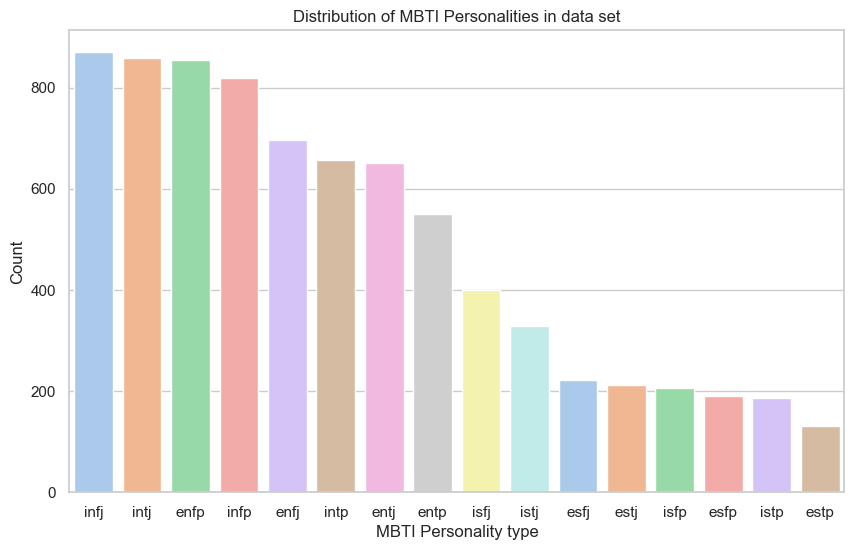

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")
# Assuming 'mbti_personality' is the column containing MBTI personalities in the final_df DataFrame
mbti_counts = final_df['mbti_personality'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=mbti_counts.index, y=mbti_counts.values, palette='pastel')
plt.title('Distribution of MBTI Personalities in data set')
plt.xlabel('MBTI Personality type')
# mbti_counts.set_xticklabels(mbti_counts.get_xticklabels(), rotation=45, ha="right")
# for p in ax.patches:
#     mbti_counts.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
#                 ha='center', va='bottom', fontsize=12)
plt.ylabel('Count')
plt.show()


In [36]:
import networkx as nx
# Load edges data
edges_df = pd.read_csv('edges.csv')
# Create a directed graph from the edges data
G = nx.from_pandas_edgelist(edges_df, 'follower_id', 'followee_id', create_using=nx.DiGraph())

# 1. Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Compute In-Degree Centrality
in_degree_centrality = nx.in_degree_centrality(G)

# 3. Compute Out-Degree Centrality
out_degree_centrality = nx.out_degree_centrality(G)

# 4. Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 5. Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 6. Compute PageRank
pagerank = nx.pagerank(G)

In [37]:
# Create a DataFrame with the computed graph-based features
graph_features_df = pd.DataFrame({
    'id': list(G.nodes),
    'degree_centrality': list(degree_centrality.values()),
    'in_degree_centrality': list(in_degree_centrality.values()),
    'out_degree_centrality': list(out_degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values()),
    'pagerank': list(pagerank.values())
})
graph_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6067 entries, 0 to 6066
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6067 non-null   int64  
 1   degree_centrality       6067 non-null   float64
 2   in_degree_centrality    6067 non-null   float64
 3   out_degree_centrality   6067 non-null   float64
 4   betweenness_centrality  6067 non-null   float64
 5   closeness_centrality    6067 non-null   float64
 6   pagerank                6067 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 331.9 KB


In [38]:

final_df = pd.merge(final_df, graph_features_df, on='id', how='left')
final_df.info()
final_df.fillna(0, inplace=True)
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7833
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7834 non-null   int64  
 1   id_str                        7834 non-null   float64
 2   verified                      7834 non-null   float64
 3   followers_count               7834 non-null   float64
 4   friends_count                 7834 non-null   float64
 5   listed_count                  7834 non-null   float64
 6   favourites_count              7834 non-null   float64
 7   statuses_count                7834 non-null   float64
 8   number_of_quoted_statuses     7834 non-null   float64
 9   number_of_retweeted_statuses  7834 non-null   float64
 10  total_retweet_count           7834 non-null   float64
 11  total_favorite_count          7834 non-null   float64
 12  total_hashtag_count           7834 non-null   float64
 13  tot

,id,id_str,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,...,location,description,clean_tweet,mbti_personality,degree_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,pagerank
0,160881623,1.608816e+08,0.0,1904.0,782.0,67.0,133836.0,410600.0,14.0,103.0,...,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,fragment star anniversary piece anniversary la...,infp,0.002638,0.001319,0.001319,7.293718e-04,0.138989,0.000184
1,28968838,2.896884e+07,0.0,14135.0,1338.0,47.0,103794.0,358901.0,23.0,113.0,...,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,please cutie trust anniversary bahay ka reach ...,infp,0.000165,0.000165,0.000000,0.000000e+00,0.160363,0.000037
2,2325006565,2.325007e+09,0.0,1223.0,604.0,31.0,178178.0,312384.0,17.0,93.0,...,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,hello tour generation ex main sound beg especi...,infp,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,907848145,9.078481e+08,0.0,8512.0,312.0,147.0,40136.0,282995.0,24.0,135.0,...,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",friendly reminder support page interest it sun...,infp,0.000659,0.000330,0.000330,1.630865e-07,0.000593,0.000597
4,1330237585,1.330238e+09,0.0,1805.0,340.0,69.0,151521.0,244181.0,2.0,68.0,...,nan,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,ti mi permission pose grave healing precure n ...,infp,0.001154,0.000659,0.000495,8.441268e-05,0.119616,0.000107


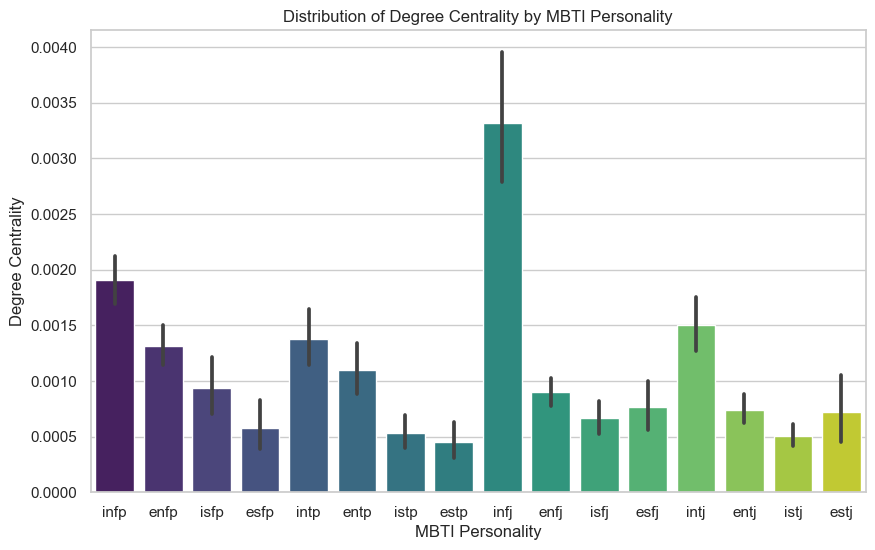

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of degree centrality
plt.figure(figsize=(10, 6))
sns.barplot(x='mbti_personality', y='degree_centrality', data=final_df, palette='viridis')
plt.title('Distribution of Degree Centrality by MBTI Personality')
plt.xlabel('MBTI Personality')
plt.ylabel('Degree Centrality')
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final_df['personality_type_labels'] = label_encoder.fit_transform(final_df['mbti_personality'])
arr = final_df["personality_type_labels"].values
brr = np.zeros((arr.size, arr.max()+1))
brr[np.arange(arr.size),arr] = 1
labels = brr.astype(int)

print(labels.shape)
final_df.head()

(7834, 16)


,id,id_str,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,...,description,clean_tweet,mbti_personality,degree_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,pagerank,personality_type_labels
0,160881623,1.608816e+08,0.0,1904.0,782.0,67.0,133836.0,410600.0,14.0,103.0,...,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,fragment star anniversary piece anniversary la...,infp,0.002638,0.001319,0.001319,7.293718e-04,0.138989,0.000184,9
1,28968838,2.896884e+07,0.0,14135.0,1338.0,47.0,103794.0,358901.0,23.0,113.0,...,right brained lefty. infp. hufflepuff. collect...,please cutie trust anniversary bahay ka reach ...,infp,0.000165,0.000165,0.000000,0.000000e+00,0.160363,0.000037,9
2,2325006565,2.325007e+09,0.0,1223.0,604.0,31.0,178178.0,312384.0,17.0,93.0,...,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,hello tour generation ex main sound beg especi...,infp,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9
3,907848145,9.078481e+08,0.0,8512.0,312.0,147.0,40136.0,282995.0,24.0,135.0,...,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",friendly reminder support page interest it sun...,infp,0.000659,0.000330,0.000330,1.630865e-07,0.000593,0.000597,9
4,1330237585,1.330238e+09,0.0,1805.0,340.0,69.0,151521.0,244181.0,2.0,68.0,...,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,ti mi permission pose grave healing precure n ...,infp,0.001154,0.000659,0.000495,8.441268e-05,0.119616,0.000107,9


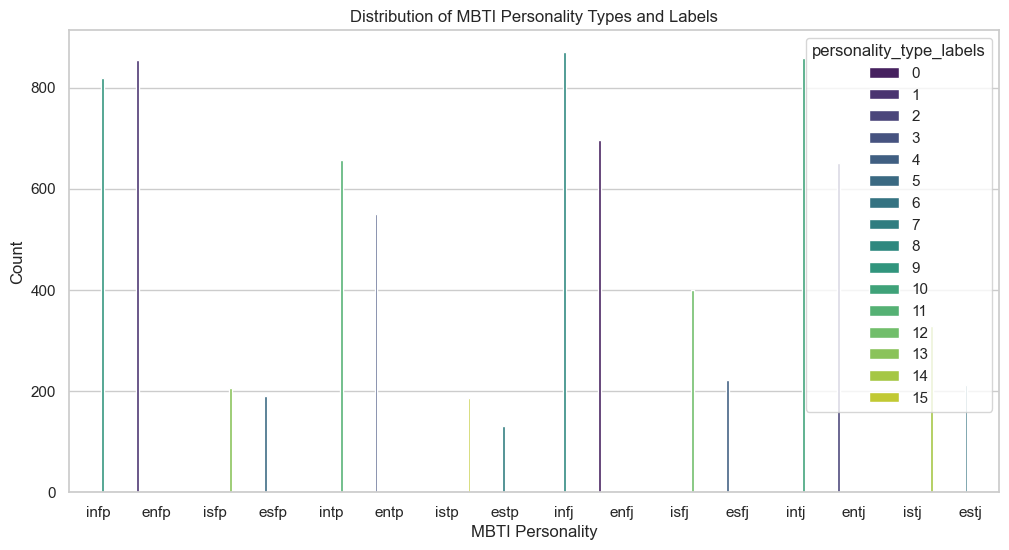

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of personality types and labels
plt.figure(figsize=(12, 6))
sns.countplot(x='mbti_personality', hue='personality_type_labels', data=final_df, palette='viridis')
plt.title('Distribution of MBTI Personality Types and Labels')
plt.xlabel('MBTI Personality')
plt.ylabel('Count')
plt.show()


In [42]:
import numpy as np
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Flatten,GlobalMaxPooling1D, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
from keras.constraints import max_norm
from sklearn.metrics import f1_score

In [43]:
final_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7833
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7834 non-null   int64  
 1   id_str                        7834 non-null   float64
 2   verified                      7834 non-null   float64
 3   followers_count               7834 non-null   float64
 4   friends_count                 7834 non-null   float64
 5   listed_count                  7834 non-null   float64
 6   favourites_count              7834 non-null   float64
 7   statuses_count                7834 non-null   float64
 8   number_of_quoted_statuses     7834 non-null   float64
 9   number_of_retweeted_statuses  7834 non-null   float64
 10  total_retweet_count           7834 non-null   float64
 11  total_favorite_count          7834 non-null   float64
 12  total_hashtag_count           7834 non-null   float64
 13  tot

In [44]:
# Tokenize the clean_tweet data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_df['clean_tweet'])
sequences = tokenizer.texts_to_sequences(final_df['clean_tweet'])

In [45]:
# Pad sequences to have consistent length
tweets = final_df['clean_tweet']
max_length = 600  # Choose an appropriate value based on your data
X = pad_sequences(sequences, maxlen=max_length)
X.shape

(7834, 600)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6267, 600), (1567, 600), (6267, 16), (1567, 16))

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [49]:
cnn_cv_scores = {'Train': {'accuracy': [], 'loss': [], 'f1_score': []}, 'Test': {'accuracy': [], 'loss': [], 'f1_score': []}}

In [50]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [52]:
n_out= labels.shape[ 1]

In [59]:

import time
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
cnn_model.add(Conv1D(300, 5,padding='valid', activation='relu', strides=1, kernel_constraint=max_norm()))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(n_out))
cnn_model.add(Activation('sigmoid'))


cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_m])

callbacks = [
      ReduceLROnPlateau(),
      EarlyStopping(patience=10),
      ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]
start_time = time.time()
cnn_model.fit(X_train, y_train,
                      epochs=20,
                      batch_size=32,
                      validation_split= 0.25,
                      callbacks=callbacks)
end_time = time.time()                      
train_loss, train_accuracy, train_f1 = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy, test_f1 = cnn_model.evaluate(X_test, y_test, verbose=0)
cnn_pred = cnn_model.predict(X_test)

print("Train: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(train_accuracy*100, train_loss, train_f1*100))
print("Test: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(test_accuracy*100, test_loss, test_f1*100)) 

train_time = end_time - start_time
print('recognition time:',train_time)

Epoch 1/20
147/147 [==============================] - 72s 486ms/step - loss: 2.6031 - categorical_accuracy: 0.1130 - f1_m: 0.1658 - val_loss: 2.6087 - val_categorical_accuracy: 0.1066 - val_f1_m: 0.1642 - lr: 0.0010
Epoch 2/20
147/147 [==============================] - 69s 472ms/step - loss: 2.4042 - categorical_accuracy: 0.2219 - f1_m: 0.1829 - val_loss: 2.5188 - val_categorical_accuracy: 0.1366 - val_f1_m: 0.1744 - lr: 0.0010
Epoch 3/20
147/147 [==============================] - 73s 497ms/step - loss: 2.2066 - categorical_accuracy: 0.3472 - f1_m: 0.2068 - val_loss: 2.5190 - val_categorical_accuracy: 0.1595 - val_f1_m: 0.1816 - lr: 0.0010
Epoch 4/20
147/147 [==============================] - 65s 442ms/step - loss: 1.8685 - categorical_accuracy: 0.5500 - f1_m: 0.2443 - val_loss: 2.4894 - val_categorical_accuracy: 0.1717 - val_f1_m: 0.1969 - lr: 0.0010
Epoch 5/20
147/147 [==============================] - 62s 422ms/step - loss: 1.3002 - categorical_accuracy: 0.7587 - f1_m: 0.3230 - val_

In [54]:
vocab_size = len(tokenizer.word_index) + 1


In [69]:
# Model definition
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
cnn_model.add(Conv1D(300, 5,padding='valid', activation='relu', strides=1, kernel_constraint=max_norm()))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(n_out))
cnn_model.add(Activation('sigmoid'))
#PSO CNN
pso_model = Sequential()
pso_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
pso_model.add(Conv1D(300, 5,padding='valid', activation='relu', strides=1, kernel_constraint=max_norm()))
pso_model.add(GlobalMaxPooling1D())
pso_model.add(Dropout(0.2))
pso_model.add(Dense(n_out))
pso_model.add(Activation('sigmoid'))



In [68]:
models = [cnn_model,pso_model]
model_names = ['CNN Model','PSO_CNN Model']
cnn_cv_scores = {'Train': {'accuracy': [], 'loss': [], 'f1_score': []}, 'Test': {'accuracy': [], 'loss': [], 'f1_score': []}}
pso_cnn_cv_scores = {'Train': {'accuracy': [], 'loss': [], 'f1_score': []}, 'Test': {'accuracy': [], 'loss': [], 'f1_score': []}}
all_cv_scores = [ cnn_cv_scores, pso_cnn_cv_scores]
predictions = {'CNN Model': [],'PSO_CNN Model': [], }

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.4, random_state=42)
# Combine train and test in preparation for KFold
X= pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)])
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)])
vocab_size = len(tokenizer.word_index) + 1

In [73]:
from sklearn.model_selection import KFold, GridSearchCV
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
for i in range(len(models)):
  train_idx = []
  test_idx = []
  print("Training", model_names[i])
  for train, test in kfold.split(X, y):
    train_idx.append(train)
    test_idx.append(test)
    models[0].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_m])
    models[1].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_m])

    callbacks = [
      ReduceLROnPlateau(),
      EarlyStopping(patience=10),
      ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]

    models[0].fit(X.iloc[train], y.iloc[train],
                      epochs=20,
                      batch_size=32,
                      validation_split = 0.25,
                      callbacks=callbacks)
    
    
   
    # Custom objective function for PSO
    def objective_function(params):
      # Get the shapes of all weights in the model
        shapes = [w.shape for w in models[1].get_weights()]
        
        # Get the total number of elements in the model's weights
        total_size = np.sum([np.prod(shape) for shape in shapes])
        print(total_size)
        # Ensure params is 1-D and has the same total size as the model's weights
        params = params[:total_size]
        
        # Reshape params to match the shapes of the model's weights
        weights = []
        idx = 0
        for shape in shapes:
            size = np.prod(shape)
            weights.append(params[idx:idx+size].reshape(shape))
            idx += size
        
        # Set the weights of the model
        models[1].set_weights(weights)
        # Predict on the test set
        start_time = time.time()
        models[1].fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32,callbacks=callbacks)
        end_time = time.time()
        y_pred = models[1].predict(X_test)
        y_pred_labels = np.argmax(y_pred, axis=1)
        train_time = end_time - start_time
        train_loss, train_accuracy, train_f1 = models[1].evaluate(X_train, y_train, verbose=0)
        test_loss, test_accuracy, test_f1 = models[1].evaluate(X_test, y_test, verbose=0)
        print("Train: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format((1-train_accuracy)*100, (1-train_loss), (1-train_f1)*100))
        print("Test: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format((1-test_accuracy)*100, (1-test_loss), (1-test_f1)*100)) 
        # Evaluate accuracy
        accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
        print('recognition time:',train_time)
        return 1-accuracy
      # Create a function wrapper for PSO
    def pso_objective_function(x):
        return np.array([objective_function(p) for p in x])


    # Flatten the weights for PSO
    dimensions = models[1].count_params()
    print(dimensions)

    # Initialize PSO parameters
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
    # Initialize PSO optimizer
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions= dimensions,  options=options)

    # Perform PSO optimization
    best_cost, best_position = optimizer.optimize(pso_objective_function, iters=1)

    # Print the best accuracy found by PSO
    print("Best Accuracy:", best_cost)

    # # Get the shapes of all weights in the model
    # shapes = [w.shape for w in model.get_weights()]

    # # Get the total number of elements in the model's weights
    # total_size = np.sum([np.prod(shape) for shape in shapes])

    # # Ensure best_position is 1-D and has the same total size as the model's weights
    # best_position = best_position[:total_size]

    # # Reshape best_position to match the shapes of the model's weights
    # best_weights = []
    # idx = 0
    # for shape in shapes:
    #     size = np.prod(shape)
    #     best_weights.append(best_position[idx:idx+size].reshape(shape))
    #     idx += size
      
    # # Set the weights of the model
    # model.set_weights(best_weights)


    # # # Evaluate the final model on the test set
    # # final_accuracy = model.evaluate(X_test, y_test)[1]
    # # print("Final Model Accuracy:", final_accuracy)


    train_loss, train_accuracy, train_f1 = models[0].evaluate(X.iloc[train], y.iloc[train], verbose=0)
    test_loss, test_accuracy, test_f1 = models[0].evaluate(X.iloc[test], y.iloc[test], verbose=0)
    print("Train: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(train_accuracy*100, train_loss, train_f1*100))
    all_cv_scores[i]['Train']['accuracy'].append(round(train_accuracy, 2))
    all_cv_scores[i]['Train']['loss'].append(round(train_loss, 2))
    all_cv_scores[i]['Train']['f1_score'].append(round(train_f1, 2))
    print("Test: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(test_accuracy*100, test_loss, test_f1*100)) 
    all_cv_scores[i]['Test']['accuracy'].append(round(test_accuracy, 2))
    all_cv_scores[i]['Test']['loss'].append(round(test_loss, 2))
    all_cv_scores[i]['Test']['f1_score'].append(round(test_f1, 2))

  prediction = models[i].predict(X.iloc[test_idx[-1]])
  predictions[model_names[i]].append(prediction)
    # Compute average metrics
  all_cv_scores[i]['Train']['accuracy'] = str(round((sum(all_cv_scores[i]['Train']['accuracy']) / len(all_cv_scores[i]['Train']['accuracy']))*100, 2))+'%'
  all_cv_scores[i]['Train']['loss'] = str(round(sum(all_cv_scores[i]['Train']['loss']) / len(all_cv_scores[i]['Train']['loss']),2))+'%'
  all_cv_scores[i]['Train']['f1_score'] = str(round((sum(all_cv_scores[i]['Train']['f1_score']) / len(all_cv_scores[i]['Train']['f1_score']))*100, 2))+'%'
  all_cv_scores[i]['Test']['accuracy'] = str(round((sum(all_cv_scores[i]['Test']['accuracy']) / len(all_cv_scores[i]['Test']['accuracy']))*100, 2))+'%'
  all_cv_scores[i]['Test']['loss'] = str(round(sum(all_cv_scores[i]['Test']['loss']) / len(all_cv_scores[i]['Test']['loss']),2))+'%'
  all_cv_scores[i]['Test']['f1_score'] = str(round((sum(all_cv_scores[i]['Test']['f1_score']) / len(all_cv_scores[i]['Test']['f1_score']))*100, 2))+'%'

  print("Average baseline metrics for {}:".format(model_names[i]), all_cv_scores[i])

Training CNN Model
Epoch 1/20
166/166 [==============================] - 74s 435ms/step - loss: 0.0503 - categorical_accuracy: 0.9974 - f1_m: 0.9200 - val_loss: 2.8687 - val_categorical_accuracy: 0.1032 - val_f1_m: 0.0234 - lr: 0.0010
Epoch 2/20
166/166 [==============================] - 73s 441ms/step - loss: 0.0377 - categorical_accuracy: 0.9972 - f1_m: 0.9371 - val_loss: 2.8718 - val_categorical_accuracy: 0.1032 - val_f1_m: 0.0235 - lr: 0.0010
Epoch 3/20
166/166 [==============================] - 70s 420ms/step - loss: 0.0290 - categorical_accuracy: 0.9977 - f1_m: 0.9417 - val_loss: 2.9465 - val_categorical_accuracy: 0.0959 - val_f1_m: 0.0251 - lr: 0.0010
Epoch 4/20
166/166 [==============================] - 72s 432ms/step - loss: 0.0250 - categorical_accuracy: 0.9977 - f1_m: 0.9474 - val_loss: 2.9723 - val_categorical_accuracy: 0.0879 - val_f1_m: 0.0239 - lr: 0.0010
Epoch 5/20
166/166 [==============================] - 71s 430ms/step - loss: 0.0174 - categorical_accuracy: 0.9985 - 

2024-01-02 13:41:27,838 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/1

3747316
98/98 [==============================] - 8s 77ms/step
Train: accuracy = 91.38%, loss = -143.83%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -146.43%, f1 score = 88.24%
recognition time: 82.29449796676636
3747316
98/98 [==============================] - 8s 76ms/step
Train: accuracy = 91.38%, loss = -96.45%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -97.43%, f1 score = 88.24%
recognition time: 64.43105864524841
3747316
98/98 [==============================] - 7s 76ms/step
Train: accuracy = 91.38%, loss = -130.48%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -132.49%, f1 score = 88.24%
recognition time: 66.36127233505249
3747316
98/98 [==============================] - 8s 77ms/step
Train: accuracy = 91.38%, loss = -111.91%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -114.06%, f1 score = 88.24%
recognition time: 65.39431118965149
3747316
98/98 [==============================] - 8s 79ms/step
Train: accuracy = 91.38%, loss = -101.83%, f1 score = 88.24%
Tes

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.907
2024-01-02 13:56:51,439 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9068283343969368, best pos: [0.15084148 0.62896442 0.53421616 ... 0.73058052 0.00261462 0.0773179 ]


Best Accuracy: 0.9068283343969368
Train: accuracy = 77.08%, loss = 0.77%, f1 score = 74.37%
Test: accuracy = 7.27%, loss = 3.01%, f1 score = 2.86%
Epoch 1/20
166/166 [==============================] - 72s 427ms/step - loss: 0.4278 - categorical_accuracy: 0.8962 - f1_m: 0.8935 - val_loss: 3.0379 - val_categorical_accuracy: 0.1061 - val_f1_m: 0.0316 - lr: 0.0010
Epoch 2/20
166/166 [==============================] - 70s 422ms/step - loss: 0.0556 - categorical_accuracy: 0.9885 - f1_m: 0.9485 - val_loss: 3.0324 - val_categorical_accuracy: 0.0936 - val_f1_m: 0.0278 - lr: 0.0010
Epoch 3/20
166/166 [==============================] - 73s 439ms/step - loss: 0.0244 - categorical_accuracy: 0.9958 - f1_m: 0.9591 - val_loss: 3.0317 - val_categorical_accuracy: 0.1021 - val_f1_m: 0.0301 - lr: 0.0010
Epoch 4/20
166/166 [==============================] - 70s 422ms/step - loss: 0.0138 - categorical_accuracy: 0.9985 - f1_m: 0.9668 - val_loss: 3.0304 - val_categorical_accuracy: 0.1049 - val_f1_m: 0.0320 - 

2024-01-02 14:13:35,780 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/1

3747316
98/98 [==============================] - 8s 77ms/step
Train: accuracy = 91.38%, loss = -80.93%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -82.99%, f1 score = 88.24%
recognition time: 69.17993354797363
3747316
98/98 [==============================] - 7s 73ms/step
Train: accuracy = 91.38%, loss = -100.33%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -101.81%, f1 score = 88.24%
recognition time: 64.30852437019348
3747316
98/98 [==============================] - 7s 73ms/step
Train: accuracy = 91.38%, loss = -105.57%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -105.46%, f1 score = 88.24%
recognition time: 60.657172203063965
3747316
98/98 [==============================] - 7s 74ms/step
Train: accuracy = 91.38%, loss = -99.23%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -100.68%, f1 score = 88.24%
recognition time: 60.6839873790741
3747316
98/98 [==============================] - 7s 75ms/step
Train: accuracy = 91.38%, loss = -88.57%, f1 score = 88.24%
Test:

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.907
2024-01-02 14:27:51,186 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9068283343969368, best pos: [0.58703702 0.15429879 0.47911289 ... 0.21210664 0.10688088 0.11211442]


Best Accuracy: 0.9068283343969368
Train: accuracy = 77.55%, loss = 0.78%, f1 score = 74.77%
Test: accuracy = 78.06%, loss = 0.78%, f1 score = 74.64%
Epoch 1/20
166/166 [==============================] - 70s 413ms/step - loss: 0.0068 - categorical_accuracy: 0.9987 - f1_m: 0.9787 - val_loss: 3.3090 - val_categorical_accuracy: 0.1225 - val_f1_m: 0.0272 - lr: 0.0010
Epoch 2/20
166/166 [==============================] - 65s 393ms/step - loss: 0.0057 - categorical_accuracy: 0.9989 - f1_m: 0.9854 - val_loss: 3.3080 - val_categorical_accuracy: 0.0891 - val_f1_m: 0.0253 - lr: 0.0010
Epoch 3/20
166/166 [==============================] - 66s 396ms/step - loss: 0.0041 - categorical_accuracy: 0.9991 - f1_m: 0.9882 - val_loss: 3.4083 - val_categorical_accuracy: 0.1061 - val_f1_m: 0.0262 - lr: 0.0010
Epoch 4/20
166/166 [==============================] - 65s 394ms/step - loss: 0.0042 - categorical_accuracy: 0.9991 - f1_m: 0.9868 - val_loss: 3.6432 - val_categorical_accuracy: 0.0834 - val_f1_m: 0.0242 

2024-01-02 14:41:21,567 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/1

3747316
98/98 [==============================] - 7s 73ms/step
Train: accuracy = 91.38%, loss = -131.14%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -131.07%, f1 score = 88.24%
recognition time: 72.76487994194031
3747316
98/98 [==============================] - 7s 73ms/step
Train: accuracy = 91.38%, loss = -98.75%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -98.55%, f1 score = 88.24%
recognition time: 60.49872636795044
3747316
98/98 [==============================] - 7s 74ms/step
Train: accuracy = 91.38%, loss = -84.32%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -85.06%, f1 score = 88.24%
recognition time: 60.79679799079895
3747316
98/98 [==============================] - 7s 73ms/step
Train: accuracy = 91.38%, loss = -113.08%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -113.99%, f1 score = 88.24%
recognition time: 61.158018589019775
3747316
98/98 [==============================] - 7s 74ms/step
Train: accuracy = 91.38%, loss = -126.13%, f1 score = 88.24%
Test

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.907
2024-01-02 14:56:19,524 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9068283343969368, best pos: [0.38318103 0.83046578 0.82153577 ... 0.2483275  0.59678812 0.80830576]


Best Accuracy: 0.9068283343969368
Train: accuracy = 77.49%, loss = 0.90%, f1 score = 74.98%
Test: accuracy = 77.17%, loss = 0.85%, f1 score = 73.54%
Epoch 1/20
166/166 [==============================] - 79s 464ms/step - loss: 0.0039 - categorical_accuracy: 0.9989 - f1_m: 0.9900 - val_loss: 3.8360 - val_categorical_accuracy: 0.0993 - val_f1_m: 0.0181 - lr: 0.0010
Epoch 2/20
166/166 [==============================] - 71s 430ms/step - loss: 0.0033 - categorical_accuracy: 0.9994 - f1_m: 0.9914 - val_loss: 3.7116 - val_categorical_accuracy: 0.0953 - val_f1_m: 0.0202 - lr: 0.0010
Epoch 3/20
166/166 [==============================] - 71s 430ms/step - loss: 0.0026 - categorical_accuracy: 0.9994 - f1_m: 0.9941 - val_loss: 3.6862 - val_categorical_accuracy: 0.1032 - val_f1_m: 0.0197 - lr: 0.0010
Epoch 4/20
166/166 [==============================] - 69s 419ms/step - loss: 0.0026 - categorical_accuracy: 0.9994 - f1_m: 0.9944 - val_loss: 3.7764 - val_categorical_accuracy: 0.0845 - val_f1_m: 0.0196 

2024-01-02 15:14:53,243 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/1

3747316
98/98 [==============================] - 8s 80ms/step
Train: accuracy = 91.38%, loss = -79.96%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -79.99%, f1 score = 88.24%
recognition time: 78.12743377685547
3747316
98/98 [==============================] - 8s 80ms/step
Train: accuracy = 91.38%, loss = -126.19%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -129.06%, f1 score = 88.24%
recognition time: 64.91253733634949
3747316
98/98 [==============================] - 8s 79ms/step
Train: accuracy = 91.38%, loss = -112.31%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -114.16%, f1 score = 88.24%
recognition time: 64.62924075126648
3747316
98/98 [==============================] - 8s 82ms/step
Train: accuracy = 91.38%, loss = -107.16%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -108.67%, f1 score = 88.24%
recognition time: 66.02758836746216
3747316
98/98 [==============================] - 8s 82ms/step
Train: accuracy = 91.38%, loss = -100.34%, f1 score = 88.24%
Tes

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.907
2024-01-02 15:30:09,850 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9068283343969368, best pos: [0.52475285 0.25748534 0.49246543 ... 0.88433843 0.95580012 0.57095552]


Best Accuracy: 0.9068283343969368
Train: accuracy = 77.55%, loss = 0.98%, f1 score = 75.04%
Test: accuracy = 77.68%, loss = 0.98%, f1 score = 74.58%
Epoch 1/20
166/166 [==============================] - 75s 440ms/step - loss: 0.0046 - categorical_accuracy: 0.9985 - f1_m: 0.9923 - val_loss: 3.9634 - val_categorical_accuracy: 0.1027 - val_f1_m: 0.0255 - lr: 0.0010
Epoch 2/20
166/166 [==============================] - 71s 425ms/step - loss: 0.0032 - categorical_accuracy: 0.9991 - f1_m: 0.9951 - val_loss: 3.9458 - val_categorical_accuracy: 0.1038 - val_f1_m: 0.0259 - lr: 0.0010
Epoch 3/20
166/166 [==============================] - 71s 429ms/step - loss: 0.0035 - categorical_accuracy: 0.9991 - f1_m: 0.9937 - val_loss: 4.1210 - val_categorical_accuracy: 0.1106 - val_f1_m: 0.0257 - lr: 0.0010
Epoch 4/20
166/166 [==============================] - 70s 422ms/step - loss: 0.0031 - categorical_accuracy: 0.9991 - f1_m: 0.9953 - val_loss: 3.9647 - val_categorical_accuracy: 0.1072 - val_f1_m: 0.0237 

2024-01-02 15:44:45,147 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/1

3747316
98/98 [==============================] - 8s 82ms/step
Train: accuracy = 91.38%, loss = -152.79%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -153.47%, f1 score = 88.24%
recognition time: 72.54293203353882
3747316
98/98 [==============================] - 8s 78ms/step
Train: accuracy = 91.38%, loss = -96.41%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -98.37%, f1 score = 88.24%
recognition time: 66.47828149795532
3747316
98/98 [==============================] - 12s 126ms/step
Train: accuracy = 91.38%, loss = -130.49%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -131.51%, f1 score = 88.24%
recognition time: 77.41947960853577
3747316
98/98 [==============================] - 9s 94ms/step
Train: accuracy = 91.38%, loss = -111.24%, f1 score = 88.24%
Test: accuracy = 90.68%, loss = -112.90%, f1 score = 88.24%
recognition time: 72.96327781677246
3747316
98/98 [==============================] - 9s 93ms/step
Train: accuracy = 91.38%, loss = -133.79%, f1 score = 88.24%
T

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.907
2024-01-02 16:01:41,060 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9068283343969368, best pos: [0.46085997 0.61824794 0.86369807 ... 0.1153046  0.34683168 0.67708385]


Best Accuracy: 0.9068283343969368
Train: accuracy = 77.45%, loss = 1.04%, f1 score = 75.01%
Test: accuracy = 75.61%, loss = 1.10%, f1 score = 71.84%
Epoch 1/20
166/166 [==============================] - 158s 488ms/step - loss: 0.0032 - categorical_accuracy: 0.9991 - f1_m: 0.9909 - val_loss: 4.1653 - val_categorical_accuracy: 0.1083 - val_f1_m: 0.0160 - lr: 0.0010
Epoch 2/20
 88/166 [==============>...............] - ETA: 37s - loss: 0.0012 - categorical_accuracy: 0.9996 - f1_m: 0.9926

KeyboardInterrupt: 

In [55]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(Conv1D(300, 5,padding='valid', activation='relu', strides=1, kernel_constraint=max_norm()))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(n_out))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_m])



In [56]:
# Custom objective function for PSO
def objective_function(params):
   # Get the shapes of all weights in the model
    shapes = [w.shape for w in model.get_weights()]
    
    # Get the total number of elements in the model's weights
    total_size = np.sum([np.prod(shape) for shape in shapes])
    print(total_size)
    # Ensure params is 1-D and has the same total size as the model's weights
    params = params[:total_size]
    
    # Reshape params to match the shapes of the model's weights
    weights = []
    idx = 0
    for shape in shapes:
        size = np.prod(shape)
        weights.append(params[idx:idx+size].reshape(shape))
        idx += size
    
    # Set the weights of the model
    model.set_weights(weights)
    # Predict on the test set
    start_time = time.time()
    model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32,callbacks=callbacks)
    end_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    train_time = end_time - start_time
    train_loss, train_accuracy, train_f1 = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy, test_f1 = model.evaluate(X_test, y_test, verbose=0)
    print("Train: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format((1-train_accuracy)*100, (1-train_loss), (1-train_f1)*100))
    print("Test: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format((1-test_accuracy)*100, (1-test_loss), (1-test_f1)*100)) 
    # Evaluate accuracy
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
    print('recognition time:',train_time)
    return 1-accuracy


In [58]:
# Flatten the weights for PSO
dimensions = model.count_params()
print(dimensions)

# Initialize PSO parameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
# Initialize PSO optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions= dimensions,  options=options)

# Perform PSO optimization
best_cost, best_position = optimizer.optimize(pso_objective_function, iters=1)

# Print the best accuracy found by PSO
print("Best Accuracy:", best_cost)

# Get the shapes of all weights in the model
shapes = [w.shape for w in model.get_weights()]

# Get the total number of elements in the model's weights
total_size = np.sum([np.prod(shape) for shape in shapes])

# Ensure best_position is 1-D and has the same total size as the model's weights
best_position = best_position[:total_size]

# Reshape best_position to match the shapes of the model's weights
best_weights = []
idx = 0
for shape in shapes:
    size = np.prod(shape)
    best_weights.append(best_position[idx:idx+size].reshape(shape))
    idx += size
   
# Set the weights of the model
model.set_weights(best_weights)


# Evaluate the final model on the test set
final_accuracy = model.evaluate(X_test, y_test)[1]
print("Final Model Accuracy:", final_accuracy)

3747316


2024-01-02 01:32:10,342 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.7, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1

3747316
49/49 [==============================] - 4s 68ms/step
Train: accuracy = 91.18%, loss = -109.67%, f1 score = 88.24%
Test: accuracy = 90.81%, loss = -109.92%, f1 score = 88.24%
recognition time: 80.16232895851135
3747316
49/49 [==============================] - 3s 67ms/step
Train: accuracy = 91.18%, loss = -95.82%, f1 score = 88.24%
Test: accuracy = 90.81%, loss = -96.34%, f1 score = 88.24%
recognition time: 78.62706565856934
3747316
49/49 [==============================] - 4s 71ms/step
Train: accuracy = 91.18%, loss = -147.83%, f1 score = 88.24%
Test: accuracy = 90.81%, loss = -150.29%, f1 score = 88.24%
recognition time: 78.20275664329529
3747316
49/49 [==============================] - 4s 72ms/step
Train: accuracy = 91.18%, loss = -165.33%, f1 score = 88.24%
Test: accuracy = 90.81%, loss = -164.95%, f1 score = 88.24%
recognition time: 78.63420104980469
3747316
49/49 [==============================] - 3s 69ms/step
Train: accuracy = 91.18%, loss = -157.04%, f1 score = 88.24%
Tes

pyswarms.single.global_best: 100%|██████████|1/1, best_cost=0.908
2024-01-02 01:48:43,681 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9081046585832802, best pos: [0.47844072 0.56695497 0.00218004 ... 0.27868387 0.80336606 0.36730135]


Best Accuracy: 0.9081046585832802
49/49 [==============================] - 4s 76ms/step - loss: 1176.4486 - categorical_accuracy: 0.0919 - f1_m: 0.1176
Final Model Accuracy: 0.09189534187316895


In [ ]:
# Set the weights of the model to the best weights found
cnn_model.set_weights(best_weights)

train_loss, train_accuracy, train_f1 = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy, test_f1 = cnn_model.evaluate(X_test, y_test, verbose=0)
cnn_pred = cnn_model.predict(X_test)

print("Train: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(train_accuracy*100, train_loss, train_f1*100))
print("Test: accuracy = {:.2f}%, loss = {:.2f}%, f1 score = {:.2f}%".format(test_accuracy*100, test_loss, test_f1*100)) 

NameError: name 'best_weights' is not defined

In [ ]:
n_out = labels.shape[1]

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()

In [ ]:
# Evaluate the model on test data
test_metrics = model.evaluate(X_test, y_test)
train_metrics = model.evaluate(X_train, y_train)

In [ ]:
print("Recognition Report:")
print(classification_report(y_test.argmax(axis=-1), y_pred))
# Print test metrics summary
print("\nTest Metrics:")
print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

# Print training time
print(f"Training Time: {training_time} seconds")

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = y_test.argmax(axis=-1)
conf_matrix= confusion_matrix(y_true, y_pred)

In [ ]:
y_test.shape, y_pred.shape

NameError: name 'y_pred' is not defined

In [ ]:
# Calculate confusion matrix

# Initialize dictionaries to store performance metrics for each personality trait
fpr_dict = {}
precision_dict = {}
accuracy_dict = {}
f1_dict = {}

In [ ]:
# Loop through each personality trait
for personality_idx in range(16):
    # Extract TP, TN, FP, FN from confusion matrix
    tp = conf_matrix[personality_idx, personality_idx]
    tn = np.sum(np.delete(np.delete(conf_matrix, personality_idx, axis=0), personality_idx, axis=1))
    fp = np.sum(conf_matrix[:, personality_idx]) - tp
    fn = np.sum(conf_matrix[personality_idx, :]) - tp

    # Calculate FPR (%)
    fpr = fp / (fp + tn) * 100
    fpr_dict[personality_idx] = fpr

    # Calculate precision
    precision = tp / (tp + fp)
    precision_dict[personality_idx] = precision

    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_dict[personality_idx] = accuracy

    # Calculate F1 score
    f1 = 2 * (precision * accuracy) / (precision + accuracy)
    f1_dict[personality_idx] = f1

In [ ]:
 

# Print performance metrics
print("Performance Metrics:")
for personality_idx in range(16):
    print(f"\nPersonality Trait {personality_idx + 1}:")
    print(f"FPR: {fpr_dict[personality_idx]:.2f}%")
    print(f"Precision: {precision_dict[personality_idx]:.4f}")
    print(f"Accuracy: {accuracy_dict[personality_idx]:.4f}")
    print(f"F1 Score: {f1_dict[personality_idx]:.4f}")
# Calculate the recognition time
recognition_time = end_time - start_time
print(f"Recognition Time: {recognition_time} seconds")
# Print time
print(f"\nTotal time: {training_time + testing_time} seconds")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for performance metrics
fpr_df = pd.DataFrame.from_dict(fpr_dict, orient='index', columns=['FPR'])
precision_df = pd.DataFrame.from_dict(precision_dict, orient='index', columns=['Precision'])
accuracy_df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
f1_df = pd.DataFrame.from_dict(f1_dict, orient='index', columns=['F1 Score'])

# Plot FPR
plt.figure(figsize=(12, 6))
sns.barplot(x=fpr_df.index, y=fpr_df['FPR'])
plt.title('False Positive Rate (FPR) for Each Personality Trait')
plt.xlabel('Personality Trait Index')
plt.ylabel('FPR (%)')
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6))
sns.barplot(x=precision_df.index, y=precision_df['Precision'])
plt.title('Precision for Each Personality Trait')
plt.xlabel('Personality Trait Index')
plt.ylabel('Precision')
plt.show()

# Plot Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df['Accuracy'])
plt.title('Accuracy for Each Personality Trait')
plt.xlabel('Personality Trait Index')
plt.ylabel('Accuracy')
plt.show()

# Plot F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x=f1_df.index, y=f1_df['F1 Score'])
plt.title('F1 Score for Each Personality Trait')
plt.xlabel('Personality Trait Index')
plt.ylabel('F1 Score')
plt.show()


In [ ]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
pip install pyswarm